In [51]:
import numpy as np
import matplotlib
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [53]:
#read the excel.file
df = pd.read_excel("C:/Users/joelm/Downloads/H1-B VISA DATASET.xlsx", usecols=['CASE_SUBMITTED','CASE_STATUS', 'VISA_CLASS', 'EMPLOYER_NAME','SECONDARY_ENTITY_1','AGENT_REPRESENTING_EMPLOYER','JOB_TITLE','SOC_TITLE', 'SOC_CODE', 'NAICS_CODE', 'FULL_TIME_POSITION','NEW_CONCURRENT_EMPLOYMENT', 'PREVAILING_WAGE_1', 'CONTINUED_EMPLOYMENT','CHANGE_PREVIOUS_EMPLOYMENT', 
             'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'H-1B_DEPENDENT', 'SUPPORT_H1B', 'WILLFUL_VIOLATOR','WAGE_RATE_OF_PAY_FROM_1', 'WAGE_UNIT_OF_PAY_1'],nrows=600000 )

In [54]:
df.head()

,CASE_STATUS,CASE_SUBMITTED,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,...,EMPLOYER_NAME,NAICS_CODE,AGENT_REPRESENTING_EMPLOYER,SECONDARY_ENTITY_1,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,PREVAILING_WAGE_1,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B
0,WITHDRAWN,2016-04-08,H-1B,ASSOCIATE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,1,0,0.0,...,"R/GA MEDIA GROUP, INC.",541810.0,NaN,NaN,179000.0,Year,NaN,N,N,NaN
1,WITHDRAWN,2017-07-14,E-3 Australian,ACCOUNT SUPERVISOR (MOTHER),11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,1,0,0.0,...,MOTHER INDUSTRIES LLC,541810.0,NaN,NaN,110000.0,Year,NaN,NaN,NaN,NaN
2,WITHDRAWN,2017-08-23,E-3 Australian,EXECUTIVE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,0,1,0.0,...,"WE ARE UNLIMITED, INC.",541810.0,NaN,NaN,275000.0,Year,NaN,NaN,NaN,NaN
3,WITHDRAWN,2017-12-22,E-3 Australian,PROJECT MANAGEMENT LEAD,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,0,1,0.0,...,"HELLO ELEPHANT, LLC",541810.0,NaN,NaN,140000.0,Year,NaN,NaN,NaN,NaN
4,WITHDRAWN,2018-01-10,E-3 Australian,"CREATIVE DIRECTOR, UX",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,0,1,0.0,...,"HELLO ELEPHANT, LLC",541810.0,NaN,NaN,180000.0,Year,NaN,NaN,NaN,NaN


In [55]:
df.drop_duplicates(inplace=True)

In [56]:
df['SOC_TITLE'].replace('COMPUTER SYSTEMS ANALYST','COMPUTER SYSTEMS ANALYSTS',inplace=True)

In [57]:
df['SOC_TITLE'].replace('SOFTWARE DEVELOPERS, APPLICATIONS','SOFTWARE DEVELOPER APPLICATIONS',inplace=True)

In [58]:
df['SOC_TITLE'].replace('SOFTARE DEVELOPERS, APPLICATIONS','SOFTWARE DEVELOPER APPLICATIONS',inplace=True)

In [59]:
df['SOC_TITLE'].replace('SOFTWARE DEVELOPERS, APPPLICATIONS','SOFTWARE DEVELOPER APPLICATIONS',inplace=True)

In [60]:
df['SOC_TITLE'].replace('SOFTWARE DEVELOPER APPLICATION','SOFTWARE DEVELOPER APPLICATIONS',inplace=True)

In [61]:
df['SOC_TITLE'].replace('MARKETING MANAGER','MARKETING MANAGERS',inplace=True)

In [62]:
df['SOC_TITLE'].replace('COMPUTER AND INFORMATION SYTEMS MANAGER','COMPUTER INFORMATION SYSTEMS MANAGERS',inplace=True)

In [63]:
df['SOC_TITLE'].replace('COMPUTER AND INFORMATION SYSTEMS MANAGER','COMPUTER INFORMATION SYSTEMS MANAGERS',inplace=True)

In [64]:
df['SOC_TITLE'].replace('SOFTWARE SEVELOPERS, APPPLICATIONS','SOFTWARE DEVELOPER APPLICATIONS',inplace=True)

In [65]:
df.value_counts('VISA_CLASS')

VISA_CLASS
H-1B               585670
E-3 Australian       9845
H-1B1 Singapore      1030
H-1B1 Chile           832
dtype: int64

In [66]:
df = df[~df.isin(['E-3 Australian']).any(axis=1)]

In [67]:
df = df[~df.isin(['H-1B1 Singapore']).any(axis=1)]

In [68]:
df = df[~df.isin(['H-1B1 Chile']).any(axis=1)]

In [69]:
df.value_counts('SOC_TITLE')

SOC_TITLE
SOFTWARE DEVELOPER APPLICATIONS                     213832
COMPUTER SYSTEMS ANALYSTS                            72215
COMPUTER OCCUPATIONS, ALL OTHER                      55985
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE                31323
COMPUTER PROGRAMMERS                                 16582
                                                     ...  
MECHANICAL ENGINEEERS                                    1
CHIEF EXECUTIVE OFFICER                                  1
MINING AND GEOLOGICAL ENG INCL MINING SAFETY ENG         1
MPUTER OCCUPATIONS, ALL OTHER                            1
15-1121                                                  1
Length: 410, dtype: int64

In [70]:
df.value_counts('VISA_CLASS')

VISA_CLASS
H-1B    585670
dtype: int64

# CASE STATUS

<AxesSubplot:title={'center':'H1B Petitions by Case Status'}>

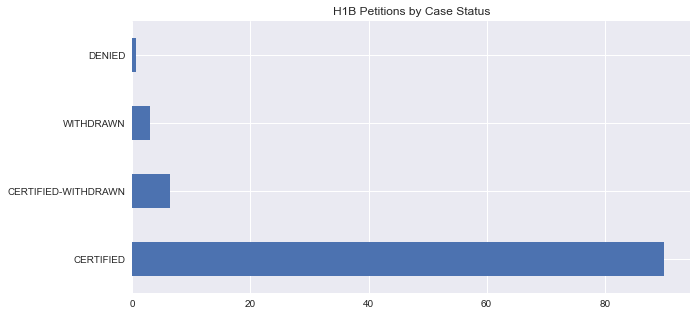

In [71]:
plt.rcParams["figure.figsize"] = (10,5)
(df.CASE_STATUS.value_counts(normalize=True)*100).plot(kind='barh',title='H1B Petitions by Case Status')

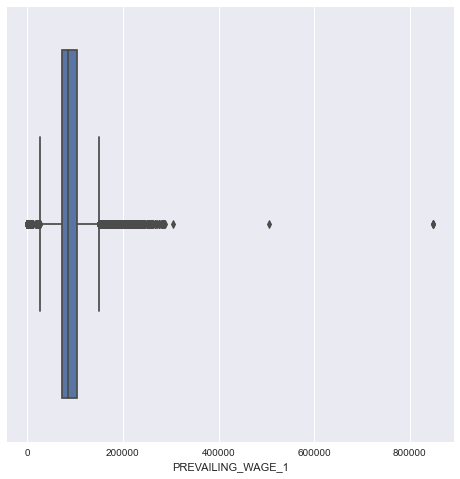

In [72]:
#checking for outlier in PREVAILING_WAGE_1
plt.figure(figsize = (8,8))
sns.boxplot(x = 'PREVAILING_WAGE_1', data = df);

In [73]:
def removeoutliers(df,column):
  Q3=df[column].quantile(0.75)
  Q1=df[column].quantile(0.25)
  IQR=Q3-Q1
  upper=Q3+(1.5*IQR)
  lower=Q1-(1.5*IQR)
  df=df[(df[column]>lower)&(df[column]<upper)]
  return df

In [74]:
#We have removed the outliers in the PREVAILING_WAGE_1
df=removeoutliers(df,'PREVAILING_WAGE_1')

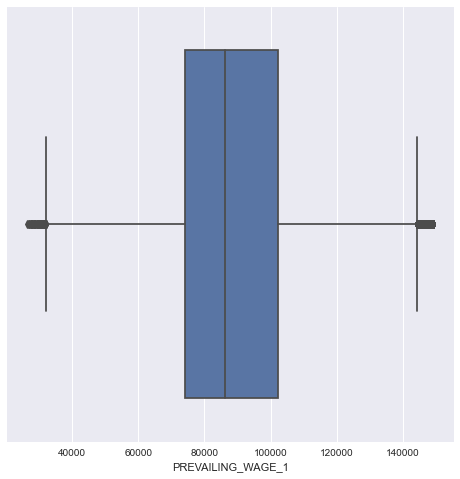

In [75]:
#After removal of outliers
plt.figure(figsize = (8,8))
sns.boxplot(x = 'PREVAILING_WAGE_1', data = df);

In [76]:
df.drop_duplicates(inplace=True)

In [77]:
df.info(null_counts=True)

<ipython-input-77-acd3301a9435>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 510897 entries, 6 to 599999
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   CASE_STATUS                  510897 non-null  object        
 1   CASE_SUBMITTED               510897 non-null  datetime64[ns]
 2   VISA_CLASS                   510897 non-null  object        
 3   JOB_TITLE                    510897 non-null  object        
 4   SOC_CODE                     510897 non-null  object        
 5   SOC_TITLE                    510897 non-null  object        
 6   FULL_TIME_POSITION           510897 non-null  object        
 7   CONTINUED_EMPLOYMENT         510897 non-null  object        
 8   CHANGE_PREVIOUS_EMPLOYMENT   510897 non-null  int64         
 9   NEW_CONCURRENT_EMPLOYMENT    510896 non-null  float64       
 10  CHANGE_EMPLOYER              510897 non-null  int64         
 11  AMENDED_PETITION          

In [78]:
df.isnull().sum()

CASE_STATUS                         0
CASE_SUBMITTED                      0
VISA_CLASS                          0
JOB_TITLE                           0
SOC_CODE                            0
SOC_TITLE                           0
FULL_TIME_POSITION                  0
CONTINUED_EMPLOYMENT                0
CHANGE_PREVIOUS_EMPLOYMENT          0
NEW_CONCURRENT_EMPLOYMENT           1
CHANGE_EMPLOYER                     0
AMENDED_PETITION                    0
EMPLOYER_NAME                       6
NAICS_CODE                          2
AGENT_REPRESENTING_EMPLOYER         4
SECONDARY_ENTITY_1              41051
WAGE_RATE_OF_PAY_FROM_1             0
WAGE_UNIT_OF_PAY_1                  0
PREVAILING_WAGE_1                   0
H-1B_DEPENDENT                     20
WILLFUL_VIOLATOR                   20
SUPPORT_H1B                    303279
dtype: int64

# WAGE DISTRIBUTION

In [79]:
total_certified_cases = df[df['CASE_STATUS']=='CERTIFIED']
certified_cases = total_certified_cases[total_certified_cases['PREVAILING_WAGE_1']<150000]

In [80]:
certified_cases.head(3)

,CASE_STATUS,CASE_SUBMITTED,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,...,EMPLOYER_NAME,NAICS_CODE,AGENT_REPRESENTING_EMPLOYER,SECONDARY_ENTITY_1,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,PREVAILING_WAGE_1,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B
47,CERTIFIED,2018-10-26 17:31:16,H-1B,PROGRAM MANAGER I,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,0,0,0.0,...,UNIVERSITY OF TEXAS AT DALLAS,611310.0,N,NaN,67500.0,Year,55370.0,N,N,NaN
52,CERTIFIED,2018-11-06 12:37:33,H-1B,ASSOCIATE STRATEGY DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,1,0,0.0,...,"ZENITH MEDIA SERVICES, INC.",541830.0,Y,NaN,102000.0,Year,94806.0,N,N,NaN
54,CERTIFIED,2018-11-13 20:06:33,H-1B,ADVERTISING AND PROMOTIONS MANAGER,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,0,0,0.0,...,APPLE INC.,334111.0,Y,NaN,97781.0,Year,97781.0,N,N,NaN


C:\Users\joelm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'WAGE DISTRIBUTION')

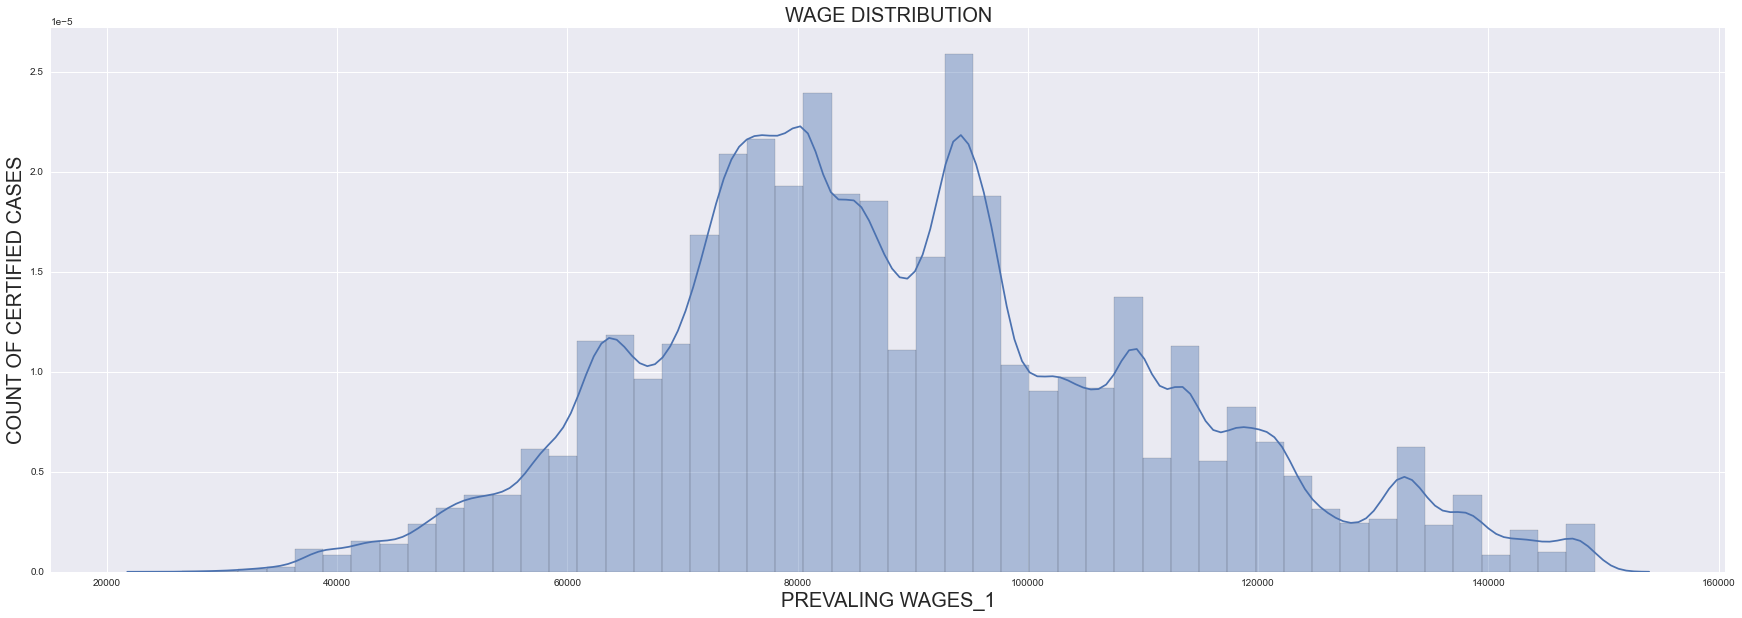

In [81]:
plt.figure(figsize=(30,10))
sns.distplot(certified_cases['PREVAILING_WAGE_1'],kde=True,hist_kws={"edgecolor": "black"})
plt.xlabel('PREVALING WAGES_1',size=20)
plt.ylabel('COUNT OF CERTIFIED CASES', size=20)
plt.title('WAGE DISTRIBUTION',size=20)

# H1-B COUNT OVER YEARS

In [82]:
import datetime
df['YEAR'] = pd.DatetimeIndex(df['CASE_SUBMITTED']).year

In [83]:
yearwise = df.groupby('YEAR').count()

<AxesSubplot:xlabel='YEAR', ylabel='CASE_STATUS'>

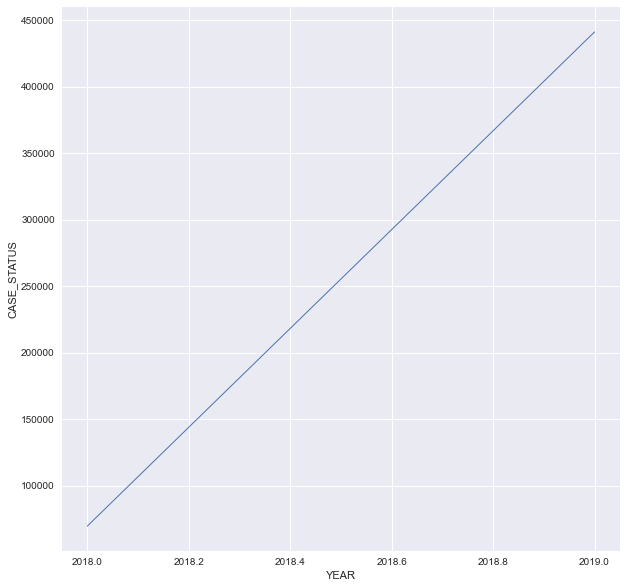

In [84]:
#we can clearly see number of applications submitted for H1-B visa has increased drastically
plt.figure(figsize=(10,10))
sns.lineplot(data=yearwise['CASE_STATUS'],linewidth=1)

# MAIN BENEFICIARY OF H1-B VISA

In [85]:
#top 20 employers
top_twenty=certified_cases['EMPLOYER_NAME'].value_counts()[:20]
top_twenty.to_frame()

,EMPLOYER_NAME
COGNIZANT TECHNOLOGY SOLUTIONS US CORP,27555
INFOSYS LIMITED,15187
TATA CONSULTANCY SERVICES LIMITED,11725
ERNST & YOUNG U.S. LLP,8444
GOOGLE LLC,8052
CAPGEMINI AMERICA INC,7688
DELOITTE CONSULTING LLP,7312
"AMAZON.COM SERVICES, INC.",6461
MICROSOFT CORPORATION,5416
ACCENTURE LLP,5366


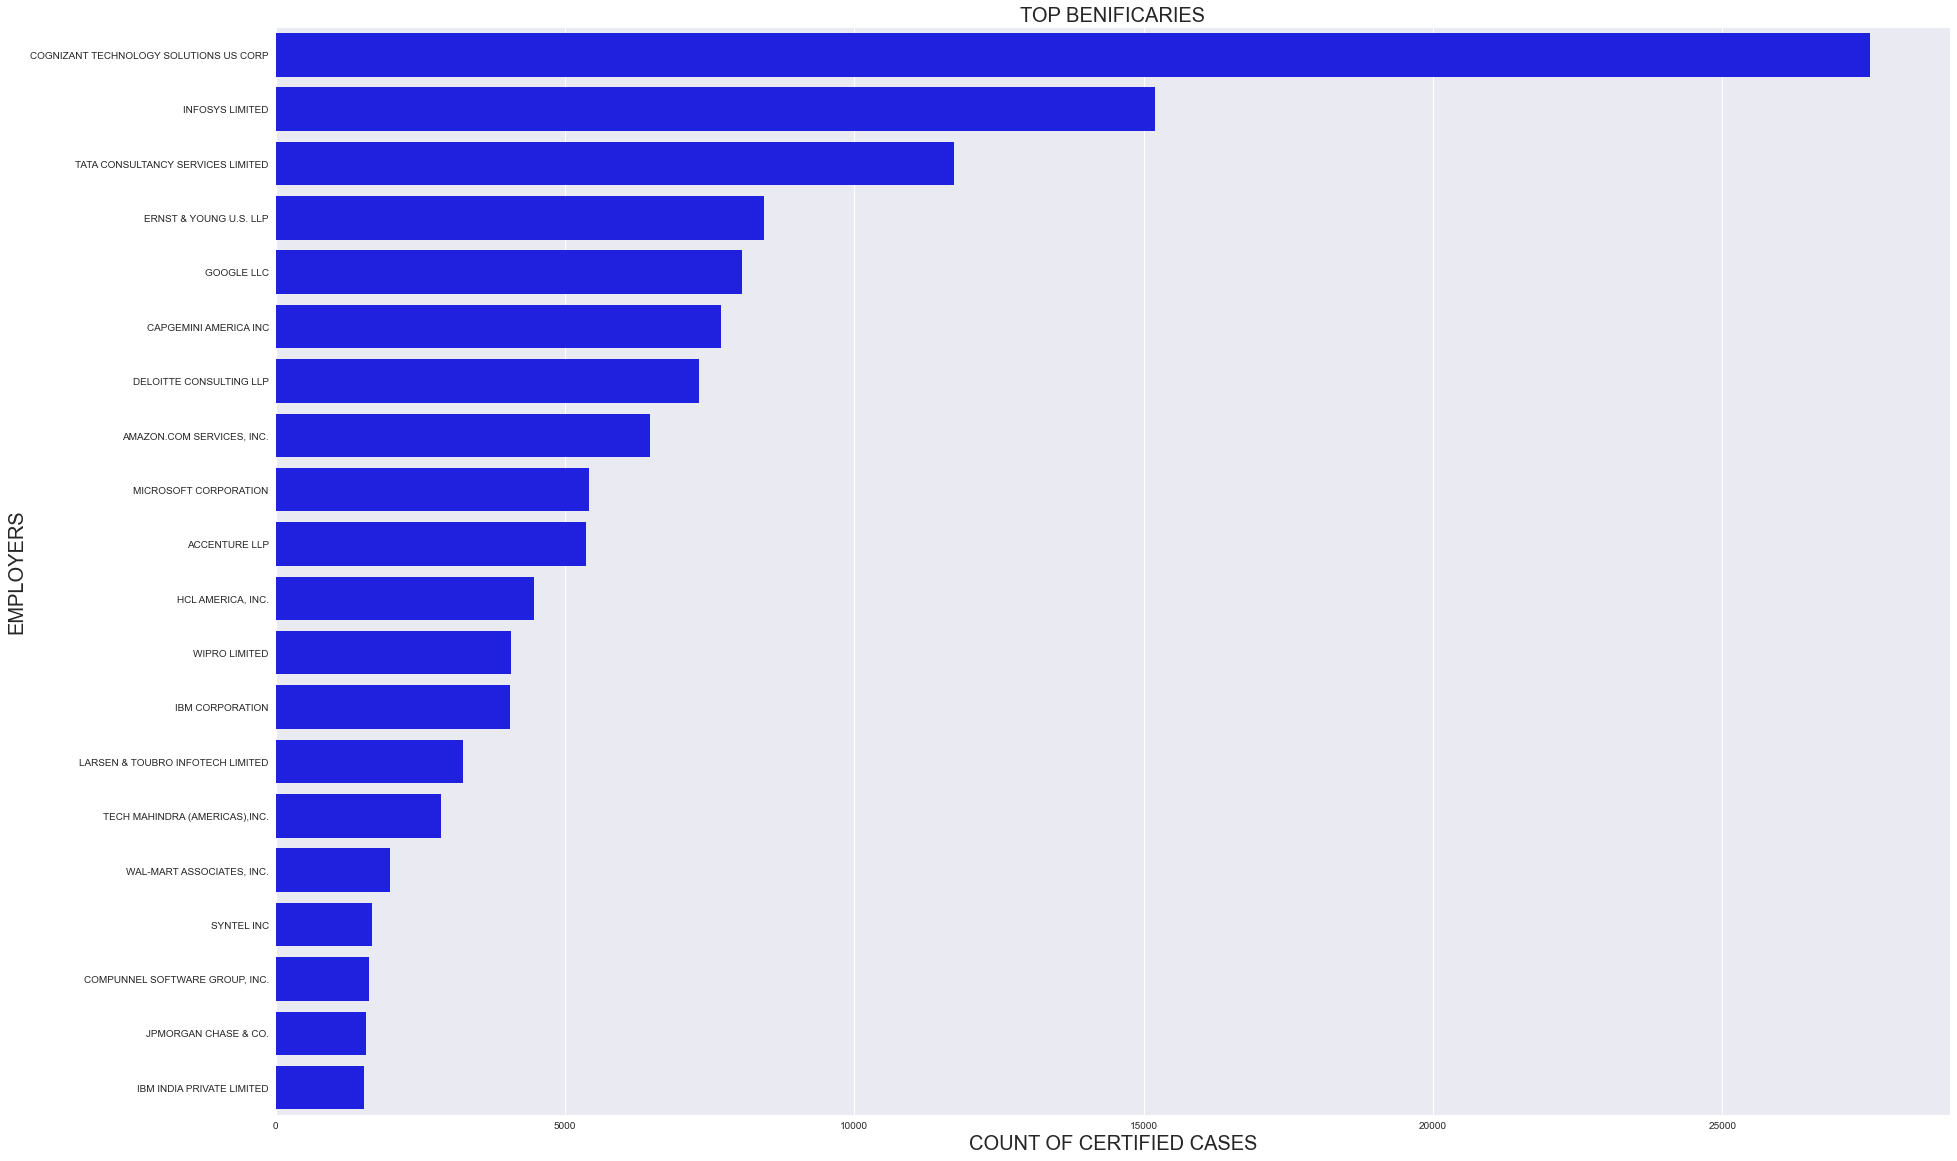

In [86]:
plt.figure(figsize=(30,20))
sns.barplot(x=top_twenty.values,y=top_twenty.index,color='blue')
plt.xlabel('COUNT OF CERTIFIED CASES',size=20)
plt.ylabel('EMPLOYERS', size=20)
plt.title('TOP BENIFICARIES',size=20)
plt.show()

# We take top 10 beneficiary of h1-b visa and see how the salary is distributed

C:\Users\joelm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\joelm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\joelm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

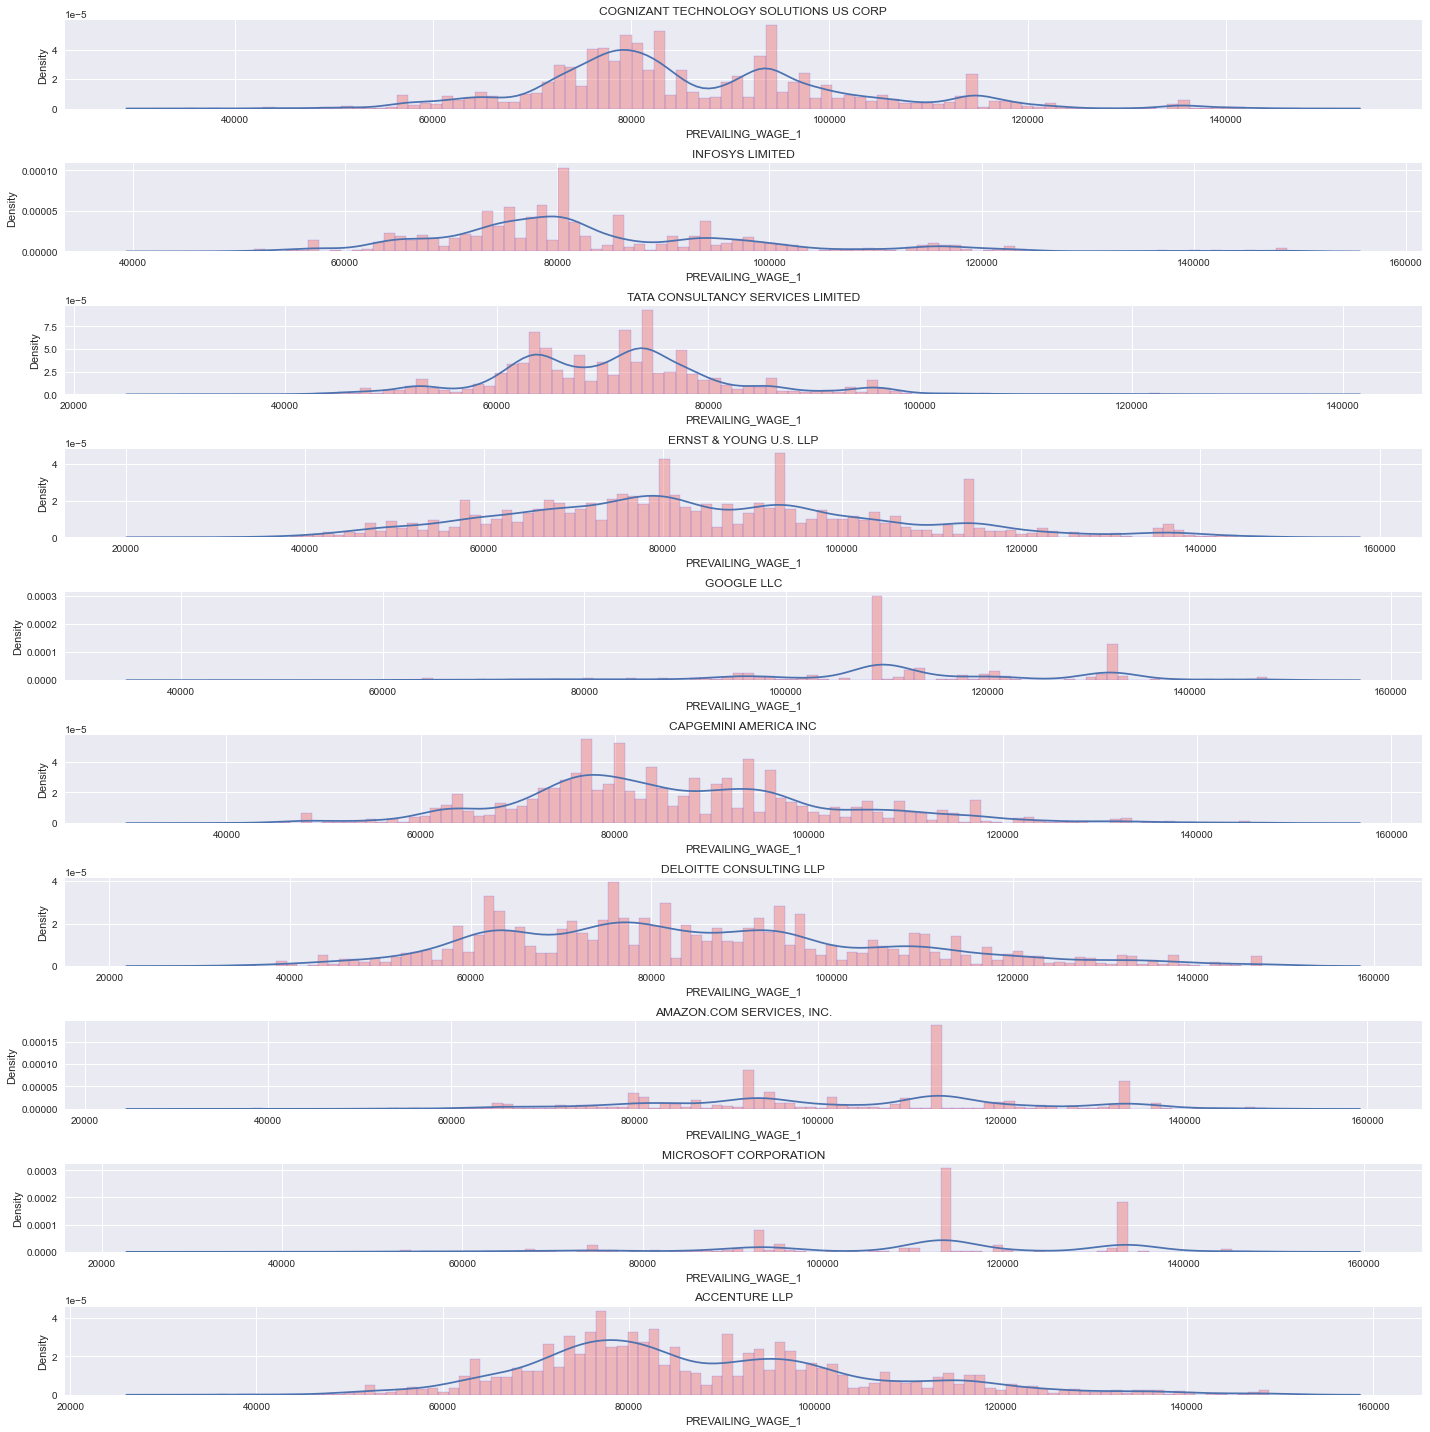

In [87]:
f,axes = plt.subplots(nrows=10,ncols=1, figsize=(20,20),sharey=False)
rowcount=0
companies = top_twenty.index[:10]
for company in companies:
    axes[rowcount].set_title(company)
    wage = certified_cases[certified_cases['EMPLOYER_NAME']==company]['PREVAILING_WAGE_1']
    sns.distplot(wage ,ax=axes[rowcount],bins=100,hist_kws= {"edgecolor":"blue", "color": "#EE6666"}, kde=True)
    rowcount+=1
    
plt.tight_layout()

# What are the top roles 

Text(0.5, 1.0, 'TOP JOB BENIFICARIES')

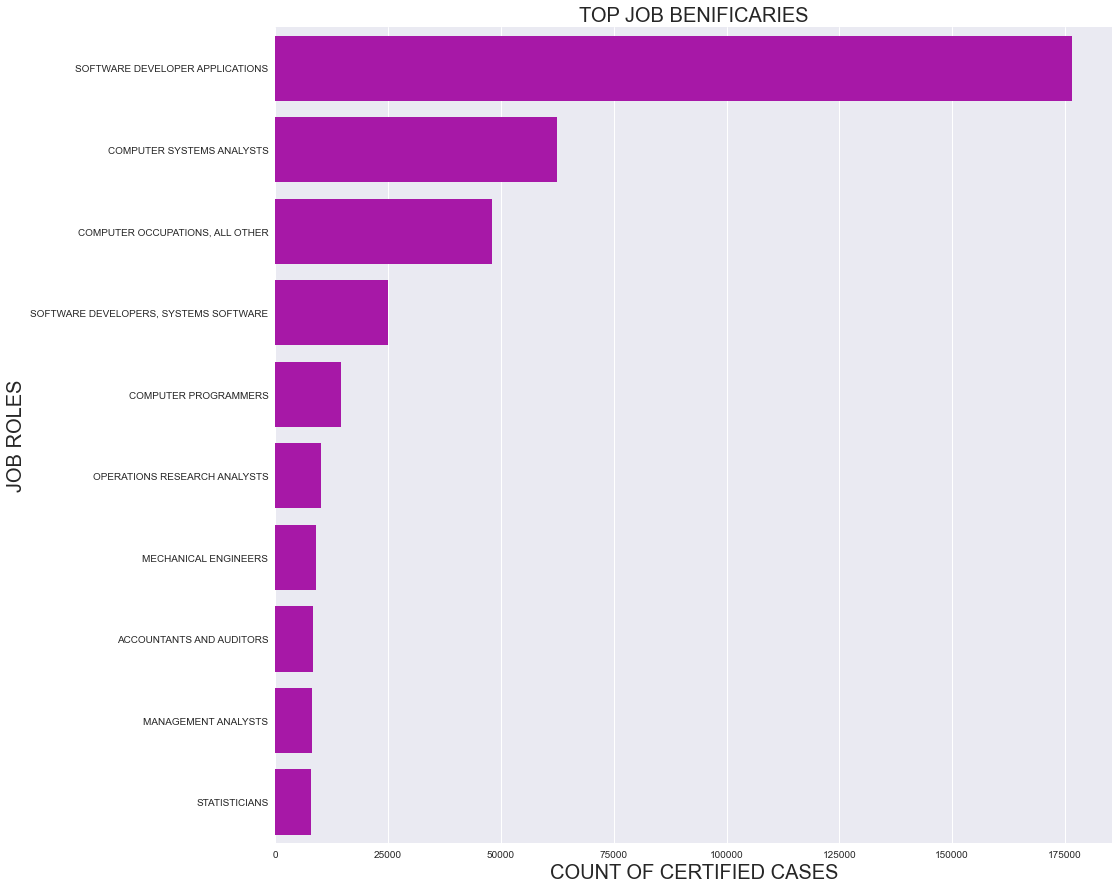

In [88]:
top_roles = certified_cases['SOC_TITLE'].value_counts().head(10)
plt.figure(figsize=(15,15))
sns.barplot(y = top_roles.index ,x = top_roles.values ,color='m')
plt.xlabel('COUNT OF CERTIFIED CASES',size=20)
plt.ylabel('JOB ROLES', size=20)
plt.title('TOP JOB BENIFICARIES',size=20)

# Does having a full time job position influence the chance of getting the visa

In [89]:
certified_cases[certified_cases["FULL_TIME_POSITION"] == "Y"].count()

CASE_STATUS                    477656
CASE_SUBMITTED                 477656
VISA_CLASS                     477656
JOB_TITLE                      477656
SOC_CODE                       477656
SOC_TITLE                      477656
FULL_TIME_POSITION             477656
CONTINUED_EMPLOYMENT           477656
CHANGE_PREVIOUS_EMPLOYMENT     477656
NEW_CONCURRENT_EMPLOYMENT      477655
CHANGE_EMPLOYER                477656
AMENDED_PETITION               477656
EMPLOYER_NAME                  477653
NAICS_CODE                     477656
AGENT_REPRESENTING_EMPLOYER    477656
SECONDARY_ENTITY_1             439531
WAGE_RATE_OF_PAY_FROM_1        477656
WAGE_UNIT_OF_PAY_1             477656
PREVAILING_WAGE_1              477656
H-1B_DEPENDENT                 477656
WILLFUL_VIOLATOR               477656
SUPPORT_H1B                    196292
dtype: int64

<AxesSubplot:>

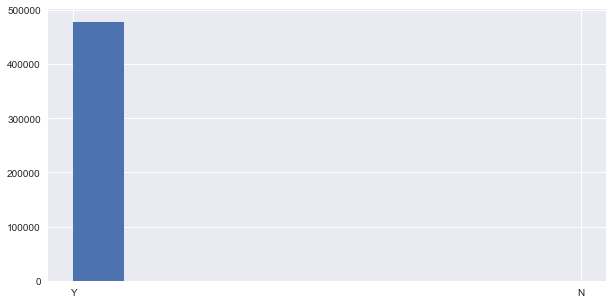

In [90]:
certified_cases['FULL_TIME_POSITION'].hist()

# How many people are granted the visa.

In [91]:
df.groupby('CASE_STATUS').count()

,CASE_SUBMITTED,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,...,NAICS_CODE,AGENT_REPRESENTING_EMPLOYER,SECONDARY_ENTITY_1,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,PREVAILING_WAGE_1,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,YEAR
CASE_STATUS,,,,,,,,,,,,,,,,,,,,,
CERTIFIED,477686,477686,477686,477686,477686,477686,477686,477686,477685,477686,...,477686,477686,439561,477686,477686,477686,477686,477686,196292,477686
CERTIFIED-WITHDRAWN,16468,16468,16468,16468,16468,16468,16468,16468,16468,16468,...,16468,16468,14938,16468,16468,16468,16468,16468,5528,16468
DENIED,3442,3442,3442,3442,3442,3442,3442,3442,3442,3442,...,3441,3439,3015,3442,3442,3442,3424,3424,661,3442
WITHDRAWN,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,...,13300,13300,12332,13301,13301,13301,13299,13299,5137,13301


<AxesSubplot:xlabel='CASE_STATUS'>

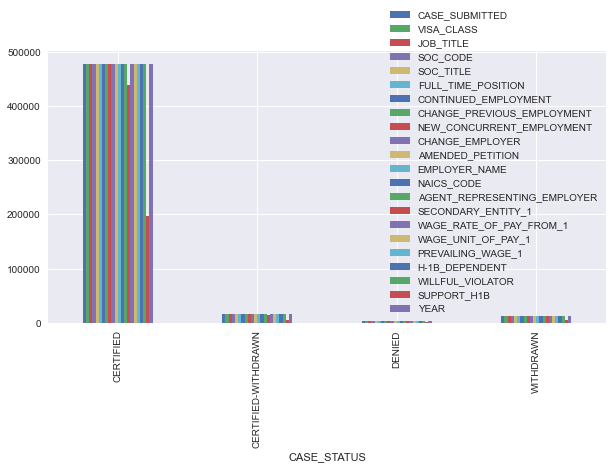

In [92]:
df.groupby('CASE_STATUS').count().plot(kind = 'bar')

# FEATURE ENGINEERING

In [93]:
df['CASE_STATUS'] = df['CASE_STATUS'].map({'CERTIFIED' : 0, 'CERTIFIED-WITHDRAWN' : 1, 'DENIED' : 2, 'WITHDRAWN' : 3})

In [94]:
df.AGENT_REPRESENTING_EMPLOYER.value_counts(dropna = False)

Y      357961
N      152932
NaN         4
Name: AGENT_REPRESENTING_EMPLOYER, dtype: int64

In [95]:
df['FULL_TIME_POSITION'] = df['FULL_TIME_POSITION'].map({'N' : 0, 'Y' : 1})
df['H-1B_DEPENDENT'] = df['H-1B_DEPENDENT'].map({'N' : 0, 'Y' : 1})
df['WILLFUL_VIOLATOR'] = df['WILLFUL_VIOLATOR'].map({'N' : 0, 'Y' : 1})
df['AGENT_REPRESENTING_EMPLOYER'] = df['AGENT_REPRESENTING_EMPLOYER'].map({'N' : 0, 'Y' : 1})
df['SECONDARY_ENTITY_1'] = df['SECONDARY_ENTITY_1'].map({'N' : 0, 'Y' : 1})

In [96]:
df['AGENT_REPRESENTING_EMPLOYER'] = df['AGENT_REPRESENTING_EMPLOYER'].fillna(df['AGENT_REPRESENTING_EMPLOYER'].mode()[0])
df['SECONDARY_ENTITY_1'] = df['SECONDARY_ENTITY_1'].fillna(df['SECONDARY_ENTITY_1'].mode()[0])
df['WILLFUL_VIOLATOR'] = df['WILLFUL_VIOLATOR'].fillna(df['WILLFUL_VIOLATOR'].mode()[0])
df['EMPLOYER_NAME'] = df['EMPLOYER_NAME'].fillna(df['EMPLOYER_NAME'].mode()[0])
df['JOB_TITLE'] = df['JOB_TITLE'].fillna(df['JOB_TITLE'].mode()[0])
df['NEW_CONCURRENT_EMPLOYMENT'] = df['NEW_CONCURRENT_EMPLOYMENT'].fillna(df['NEW_CONCURRENT_EMPLOYMENT'].mode()[0])
df['SOC_CODE'] = df['SOC_CODE'].fillna(df['SOC_CODE'].mode()[0])
df['H-1B_DEPENDENT'] = df['H-1B_DEPENDENT'].fillna(df['H-1B_DEPENDENT'].mode()[0])
df['NAICS_CODE'] = df['NAICS_CODE'].fillna(df['NAICS_CODE'].mode()[0])
df['SOC_CODE'] = df['SOC_CODE'].fillna(df['SOC_CODE'].mode()[0])
df['WAGE_UNIT_OF_PAY_1'] = df['WAGE_UNIT_OF_PAY_1'].fillna(df['WAGE_UNIT_OF_PAY_1'].mode()[0])

In [99]:
df.isnull().sum()

CASE_STATUS                         0
CASE_SUBMITTED                      0
VISA_CLASS                          0
JOB_TITLE                           0
SOC_CODE                            0
SOC_TITLE                           0
FULL_TIME_POSITION                  0
CONTINUED_EMPLOYMENT                0
CHANGE_PREVIOUS_EMPLOYMENT          0
NEW_CONCURRENT_EMPLOYMENT           0
CHANGE_EMPLOYER                     0
AMENDED_PETITION                    0
EMPLOYER_NAME                       0
NAICS_CODE                          0
AGENT_REPRESENTING_EMPLOYER         0
SECONDARY_ENTITY_1                  0
WAGE_RATE_OF_PAY_FROM_1             0
WAGE_UNIT_OF_PAY_1                  0
PREVAILING_WAGE_1                   0
H-1B_DEPENDENT                      0
WILLFUL_VIOLATOR                    0
SUPPORT_H1B                    303279
YEAR                                0
dtype: int64

In [100]:
df['NEW_CONCURRENT_EMP'] = df['NEW_CONCURRENT_EMPLOYMENT']
df['NEW_CONCURRENT_EMP'] = np.where(df['NEW_CONCURRENT_EMP'].isin([0]), '0',
                             np.where(df['NEW_CONCURRENT_EMP'].isin([1]), '1', '>1'))

In [102]:
df['CHANGE_PREVIOUS_EMP'] = df['CHANGE_PREVIOUS_EMPLOYMENT']
df['CHANGE_PREVIOUS_EMP'] = np.where(df['CHANGE_PREVIOUS_EMPLOYMENT'].isin([0]), '0',
                             np.where(df['CHANGE_PREVIOUS_EMPLOYMENT'].isin([1]), '1', '>1'))

In [103]:
df['AMENDED_PETITION_BIN'] = df['AMENDED_PETITION']
df['AMENDED_PETITION_BIN'] = np.where(df['AMENDED_PETITION'].isin([0]), '0',
                             np.where(df['AMENDED_PETITION'].isin([1]), '1', '>1'))

In [104]:
df['CHANGE_EMPLOYER_BIN'] = df['CHANGE_EMPLOYER']
df['CHANGE_EMPLOYER_BIN'] = np.where(df['CHANGE_EMPLOYER'].isin([0]), '0',
                             np.where(df['CHANGE_EMPLOYER'].isin([1]), '1', '>1'))

In [105]:
df['CONTINUED_EMPLOYMENT_BIN'] = df['CONTINUED_EMPLOYMENT']
df['CONTINUED_EMPLOYMENT_BIN'] = np.where(df['CONTINUED_EMPLOYMENT'].isin([0]), '0',
                             np.where(df['CONTINUED_EMPLOYMENT'].isin([1]), '1', '>1'))

In [106]:
df.AMENDED_PETITION_BIN.value_counts()

0     430681
1      69514
>1     10702
Name: AMENDED_PETITION_BIN, dtype: int64

In [107]:
df.SOC_TITLE.value_counts()

SOFTWARE DEVELOPER APPLICATIONS          189259
COMPUTER SYSTEMS ANALYSTS                 64512
COMPUTER OCCUPATIONS, ALL OTHER           51462
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE     26741
COMPUTER PROGRAMMERS                      15327
                                          ...  
TRANSPORTATION ENGINEERS                      1
REGULATORY AFFAIRS SPECIALIST                 1
GENERAL & OPERATIONS MANAGER                  1
BIOININFORMATICS SCIENTISTS                   1
HUMAN RESOURCE SPECIALIST                     1
Name: SOC_TITLE, Length: 383, dtype: int64

In [109]:
df['OCCUPATION'] = np.nan
df['SOC_TITLE'] = df['SOC_TITLE'].str.lower()
df.OCCUPATION[df['SOC_TITLE'].str.contains('computer','programmer', na=False)] = 'Computer Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('software','web developer', na=False)] = 'Computer Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('SOFTWARE DEVELOPER APPLICATIONS', na=False)] = 'Computer Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('COMPUTER SYSTEMS ANALYSTS', na=False)] = 'Computer Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE', na=False)] = 'Computer Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('COMPUTER OCCUPATIONS, ALL OTHER', na=False)] = 'Computer Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('COMPUTER PROGRAMMERS', na=False)] = 'Computer Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('database', na=False)] = 'Computer Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('math','statistic', na=False)] = 'Mathematical Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('predictive model','stats', na=False)] = 'Mathematical Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('teacher','linguist', na=False)] = 'Education Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('professor','Teach', na=False)] = 'Education Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('school principal', na=False)] = 'Education Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('medical','doctor', na=False)] = 'Medical Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('physician','dentist', na=False)] = 'Medical Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('Health','Physical Therapists', na=False)] = 'Medical Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('surgeon','nurse', na=False)] = 'Medical Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('psychiatry', na=False)] = 'Medical Occupations'
df.OCCUPATION[df['SOC_TITLE'].str.contains('chemist','physicist', na=False)] = 'Advance Sciences'
df.OCCUPATION[df['SOC_TITLE'].str.contains('biology','scientist', na=False)] = 'Advance Sciences'
df.OCCUPATION[df['SOC_TITLE'].str.contains('biologi','clinical research', na=False)] = 'Advance Sciences'
df.OCCUPATION[df['SOC_TITLE'].str.contains('public relation','manage', na=False)] = 'Management Occupation'
df.OCCUPATION[df['SOC_TITLE'].str.contains('management','operation', na=False)] = 'Management Occupation'
df.OCCUPATION[df['SOC_TITLE'].str.contains('chief','plan', na=False)] = 'Management Occupation'
df.OCCUPATION[df['SOC_TITLE'].str.contains('executive', na=False)] = 'Management Occupation'
df.OCCUPATION[df['SOC_TITLE'].str.contains('advertis','marketing', na=False)] = 'Marketing Occupation'
df.OCCUPATION[df['SOC_TITLE'].str.contains('promotion','market research', na=False)] = 'Marketing Occupation'
df.OCCUPATION[df['SOC_TITLE'].str.contains('business','business analyst', na=False)] = 'Business Occupation'
df.OCCUPATION[df['SOC_TITLE'].str.contains('business systems analyst', na=False)] = 'Business Occupation'
df.OCCUPATION[df['SOC_TITLE'].str.contains('accountant','finance', na=False)] = 'Financial Occupation'
df.OCCUPATION[df['SOC_TITLE'].str.contains('financial', na=False)] = 'Financial Occupation'
df.OCCUPATION[df['SOC_TITLE'].str.contains('engineer','architect', na=False)] = 'Architecture & Engineering'
df.OCCUPATION[df['SOC_TITLE'].str.contains('surveyor','carto', na=False)] = 'Architecture & Engineering'
df.OCCUPATION[df['SOC_TITLE'].str.contains('technician','drafter', na=False)] = 'Architecture & Engineering'
df.OCCUPATION[df['SOC_TITLE'].str.contains('information security','information tech', na=False)] = 'Architecture & Engineering'
df.OCCUPATION[df['SOC_TITLE'].str.contains('education','law', na=False)] = 'Administrative Occupation'

df['OCCUPATION']= df.OCCUPATION.replace(np.nan, 'Others', regex=True)

<ipython-input-109-e12ad25e6c85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.OCCUPATION[df['SOC_TITLE'].str.contains('computer','programmer', na=False)] = 'Computer Occupations'


In [110]:
df.OCCUPATION.value_counts(dropna = False)

Computer Occupations          375327
Architecture & Engineering     51229
Others                         45261
Financial Occupation           20888
Management Occupation           9015
Advance Sciences                6516
Medical Occupations             1171
Mathematical Occupations         560
Business Occupation              477
Administrative Occupation        306
Marketing Occupation             147
Name: OCCUPATION, dtype: int64

In [111]:
df['NEW_EMPLOYER'] = np.nan
df['EMPLOYER_NAME'] = df['EMPLOYER_NAME'].str.lower()
df.NEW_EMPLOYER[df['EMPLOYER_NAME'].str.contains('university', na = False)] = 'university'
df['NEW_EMPLOYER']= df.NEW_EMPLOYER.replace(np.nan, 'non university', regex=True)

<ipython-input-111-5a60532c1224>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.NEW_EMPLOYER[df['EMPLOYER_NAME'].str.contains('university', na = False)] = 'university'


In [112]:
df.NEW_EMPLOYER.value_counts(dropna = False)

non university    503932
university          6965
Name: NEW_EMPLOYER, dtype: int64

In [113]:
df['NEW_EMPLOYER'] = df['NEW_EMPLOYER'].map({'university' : 1, 'non university' : 0})

In [114]:
df.isnull().sum()

CASE_STATUS                         0
CASE_SUBMITTED                      0
VISA_CLASS                          0
JOB_TITLE                           0
SOC_CODE                            0
SOC_TITLE                           0
FULL_TIME_POSITION                  0
CONTINUED_EMPLOYMENT                0
CHANGE_PREVIOUS_EMPLOYMENT          0
NEW_CONCURRENT_EMPLOYMENT           0
CHANGE_EMPLOYER                     0
AMENDED_PETITION                    0
EMPLOYER_NAME                       2
NAICS_CODE                          0
AGENT_REPRESENTING_EMPLOYER         0
SECONDARY_ENTITY_1                  0
WAGE_RATE_OF_PAY_FROM_1             0
WAGE_UNIT_OF_PAY_1                  0
PREVAILING_WAGE_1                   0
H-1B_DEPENDENT                      0
WILLFUL_VIOLATOR                    0
SUPPORT_H1B                    303279
YEAR                                0
NEW_CONCURRENT_EMP                  0
CHANGE_PREVIOUS_EMP                 0
AMENDED_PETITION_BIN                0
CHANGE_EMPLO

In [120]:
df = df.drop(['SUPPORT_H1B','SOC_TITLE','EMPLOYER_NAME','JOB_TITLE','SOC_CODE','NEW_CONCURRENT_EMPLOYMENT','NAICS_CODE','CHANGE_PREVIOUS_EMPLOYMENT','AMENDED_PETITION','CONTINUED_EMPLOYMENT','WAGE_RATE_OF_PAY_FROM_1','CHANGE_EMPLOYER'], axis = 1)

KeyError: "['SUPPORT_H1B' 'SOC_TITLE' 'EMPLOYER_NAME' 'JOB_TITLE' 'SOC_CODE'\n 'NEW_CONCURRENT_EMPLOYMENT' 'NAICS_CODE' 'CHANGE_PREVIOUS_EMPLOYMENT'\n 'AMENDED_PETITION' 'CONTINUED_EMPLOYMENT' 'WAGE_RATE_OF_PAY_FROM_1'\n 'CHANGE_EMPLOYER'] not found in axis"

In [121]:
df = df.drop('CASE_SUBMITTED', axis = 1)

In [122]:
df.head()

,CASE_STATUS,VISA_CLASS,FULL_TIME_POSITION,AGENT_REPRESENTING_EMPLOYER,SECONDARY_ENTITY_1,WAGE_UNIT_OF_PAY_1,PREVAILING_WAGE_1,H-1B_DEPENDENT,WILLFUL_VIOLATOR,YEAR,NEW_CONCURRENT_EMP,CHANGE_PREVIOUS_EMP,AMENDED_PETITION_BIN,CHANGE_EMPLOYER_BIN,CONTINUED_EMPLOYMENT_BIN,OCCUPATION,NEW_EMPLOYER
6,3,H-1B,1,1.0,0.0,Year,97365.0,0.0,0.0,2018,0,1,0,0,>1,Marketing Occupation,0
7,3,H-1B,1,1.0,0.0,Year,131685.0,0.0,0.0,2019,0,0,0,0,1,Marketing Occupation,0
8,3,H-1B,1,1.0,0.0,Year,97365.0,0.0,0.0,2019,0,0,0,0,1,Marketing Occupation,0
9,3,H-1B,1,1.0,0.0,Year,126901.0,0.0,0.0,2019,0,0,0,0,0,Marketing Occupation,0
10,3,H-1B,1,1.0,0.0,Year,47549.0,0.0,0.0,2019,0,0,0,0,0,Marketing Occupation,0


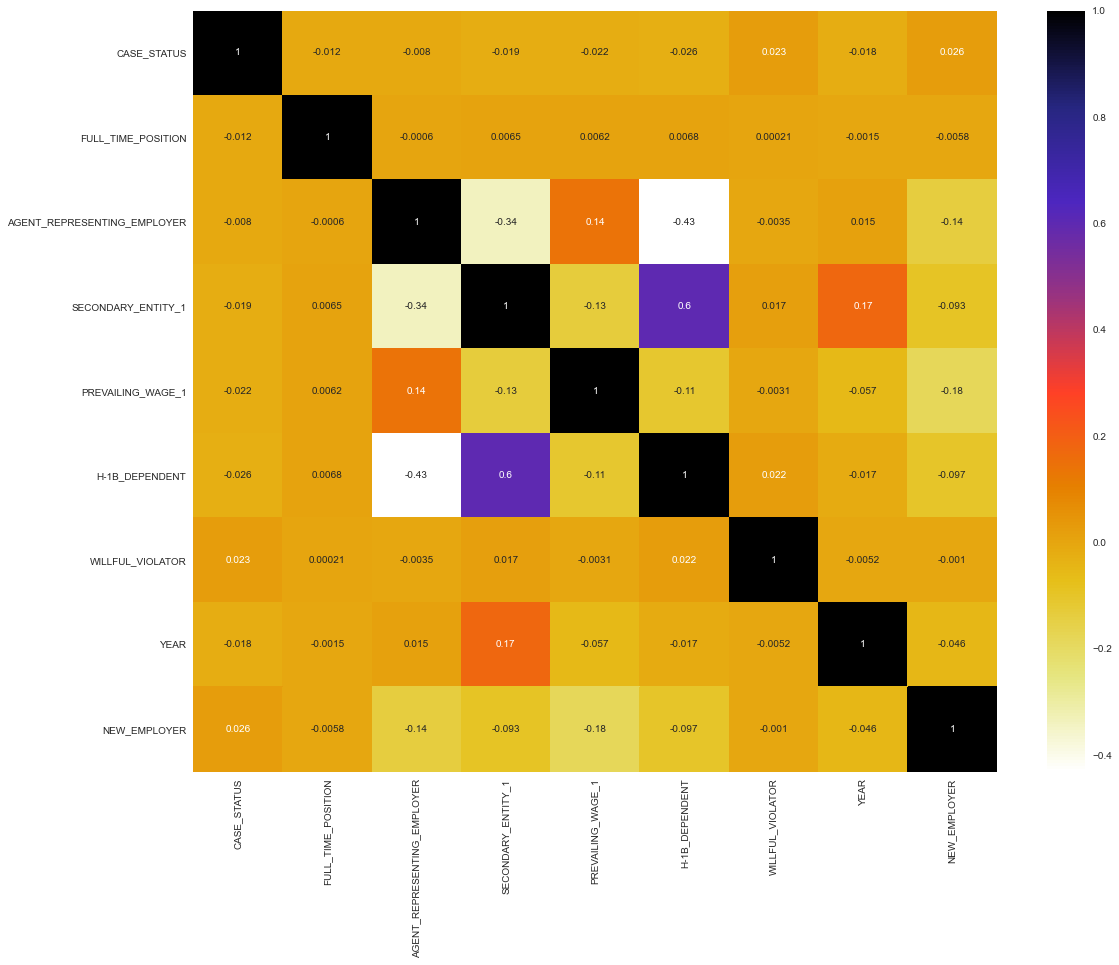

In [123]:
import seaborn as sns
plt.figure(figsize=(18, 14))
cor = df.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [124]:
df.dtypes

CASE_STATUS                      int64
VISA_CLASS                      object
FULL_TIME_POSITION               int64
AGENT_REPRESENTING_EMPLOYER    float64
SECONDARY_ENTITY_1             float64
WAGE_UNIT_OF_PAY_1              object
PREVAILING_WAGE_1              float64
H-1B_DEPENDENT                 float64
WILLFUL_VIOLATOR               float64
YEAR                             int64
NEW_CONCURRENT_EMP              object
CHANGE_PREVIOUS_EMP             object
AMENDED_PETITION_BIN            object
CHANGE_EMPLOYER_BIN             object
CONTINUED_EMPLOYMENT_BIN        object
OCCUPATION                      object
NEW_EMPLOYER                     int64
dtype: object

In [125]:
df[['CASE_STATUS', 'VISA_CLASS', 'FULL_TIME_POSITION','AGENT_REPRESENTING_EMPLOYER','SECONDARY_ENTITY_1','WAGE_UNIT_OF_PAY_1', 
     'PREVAILING_WAGE_1', 'H-1B_DEPENDENT', 'WILLFUL_VIOLATOR', 'YEAR', 'NEW_CONCURRENT_EMP', 'CHANGE_PREVIOUS_EMP', 'AMENDED_PETITION_BIN', 
     'CHANGE_EMPLOYER_BIN','CONTINUED_EMPLOYMENT_BIN','OCCUPATION','NEW_EMPLOYER']] = df[['CASE_STATUS', 'VISA_CLASS', 'FULL_TIME_POSITION','AGENT_REPRESENTING_EMPLOYER','SECONDARY_ENTITY_1','WAGE_UNIT_OF_PAY_1', 
     'PREVAILING_WAGE_1', 'H-1B_DEPENDENT', 'WILLFUL_VIOLATOR', 'YEAR', 'NEW_CONCURRENT_EMP', 'CHANGE_PREVIOUS_EMP', 'AMENDED_PETITION_BIN', 
     'CHANGE_EMPLOYER_BIN','CONTINUED_EMPLOYMENT_BIN','OCCUPATION','NEW_EMPLOYER']] .apply(lambda x: x.astype('category'))

In [126]:
df.dtypes

CASE_STATUS                    category
VISA_CLASS                     category
FULL_TIME_POSITION             category
AGENT_REPRESENTING_EMPLOYER    category
SECONDARY_ENTITY_1             category
WAGE_UNIT_OF_PAY_1             category
PREVAILING_WAGE_1              category
H-1B_DEPENDENT                 category
WILLFUL_VIOLATOR               category
YEAR                           category
NEW_CONCURRENT_EMP             category
CHANGE_PREVIOUS_EMP            category
AMENDED_PETITION_BIN           category
CHANGE_EMPLOYER_BIN            category
CONTINUED_EMPLOYMENT_BIN       category
OCCUPATION                     category
NEW_EMPLOYER                   category
dtype: object